<a href="https://colab.research.google.com/github/youngeun1207/keras/blob/main/SHL/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import numpy as np
train_data = np.load('/content/drive/MyDrive/SHLdatasets/train_data_5sec2.npy')
train_label = np.load('/content/drive/MyDrive/SHLdatasets/train_label_5sec2.npy')

val_data = np.load('/content/drive/MyDrive/SHLdatasets/val_data_5sec2.npy')
val_label= np.load('/content/drive/MyDrive/SHLdatasets/val_label_5sec2.npy')

In [ ]:
train_motion = train_data[:,:,1:10]
del train_data
val_motion = val_data[:,:,1:10]
del val_data
data = np.concatenate([train_motion, val_motion])
label = np.concatenate([train_label, val_label])
del train_motion
del val_motion

np.save("/content/drive/MyDrive/SHLdatasets/full_data", data)
np.save("/content/drive/MyDrive/SHLdatasets/full_label", label)

In [ ]:
data = np.load('/content/drive/MyDrive/SHLdatasets/full_data.npy')
label = np.load('/content/drive/MyDrive/SHLdatasets/full_label.npy')

In [ ]:
# random sampling
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(data, label, test_size=0.2, shuffle=True, stratify=label, random_state=34)
del data
del label

In [ ]:
x_train = np.nan_to_num(x_train)
x_valid = np.nan_to_num(x_valid)

In [ ]:
x_train = x_train.reshape((-1,1,9))
x_valid = x_valid.reshape((-1,1,9))

In [ ]:
mean = np.nanmean(x_train, axis=0)
x_train = x_train - mean
x_valid = x_valid - mean
std = np.nanstd(x_train, axis=0)
x_train/=std
x_valid/=std

In [ ]:
x_train = x_train.reshape((-1,500,9))
x_valid = x_valid.reshape((-1,500,9))

In [ ]:
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model = Sequential()
model.add(layers.LSTM(128, input_shape=(500, 9), return_sequences=True))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
model.summary()

history = model.fit(x_train,
                    y_train,
                    epochs=60,
                    batch_size=1024,
                    validation_data = (x_valid, y_valid))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500, 128)          70656     
                                                                 
 lstm_1 (LSTM)               (None, 500, 128)          131584    
                                                                 
 lstm_2 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 9)                 297       
                                                                 
Total params: 223,145
Trainable params: 223,145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
47/47 [==============================] - 27s 394ms/step - loss: 1.5678 - accuracy: 0.4424 - val_loss: 1.3820 - val_accuracy: 0.4950
Epoch 2/60
47/47 [===================

In [ ]:
model.save('/content/drive/MyDrive/LSTM3.h5')

In [ ]:
model.evaluate(x_valid, y_valid)

376/376 [==============================] - 10s 26ms/step - loss: 0.4706 - accuracy: 0.8466


[0.47061747312545776, 0.8465762734413147]

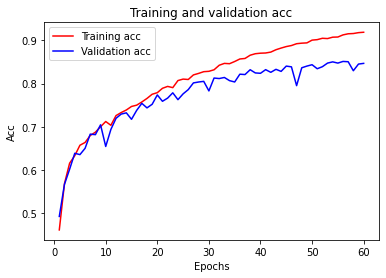

In [ ]:
# 랜덤샘플링 LSTM 3층
# accuracy: 0.8466
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model = Sequential()
model.add(layers.LSTM(128, input_shape=(500, 9), return_sequences=True))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(64))
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
model.summary()

history = model.fit(x_train,
                    y_train,
                    epochs=200,
                    batch_size=2048,
                    validation_data = (x_valid, y_valid))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 500, 128)          70656     
                                                                 
 lstm_4 (LSTM)               (None, 500, 128)          131584    
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 252,233
Trainable params: 252,233
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
24/24 [==============================] - 25s 884ms/step - loss: 1.6499 - accuracy: 0.4067 - val_loss: 1.4284 - val_accuracy: 0.4726
Epoch 2/200
24/24 [=================

376/376 [==============================] - 10s 27ms/step - loss: 0.5803 - accuracy: 0.8560


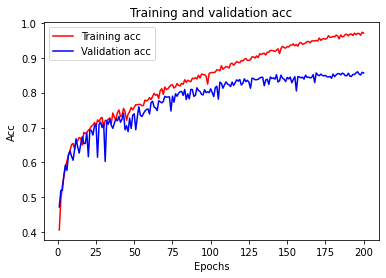

In [ ]:
model.save('/content/drive/MyDrive/LSTM3_norm.h5')
model.evaluate(x_valid, y_valid)

# 랜덤샘플링 LSTM 3층, 정규화
# accuracy: 0.8560
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# CRNN
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(128, 5, activation='relu',
                        input_shape=((x_train.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(3))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.GRU(128))
model_crnn.add(layers.Dense(9, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(x_train,
                    y_train,
                    epochs=200,
                    batch_size=2048,
                    validation_data = (x_valid, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 496, 128)          5888      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 165, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 161, 128)          82048     
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 9)                 1161      
                                                                 
Total params: 188,169
Trainable params: 188,169
Non-trainable params: 0
__________________________________________________

376/376 [==============================] - 7s 19ms/step - loss: 0.5637 - accuracy: 0.8854


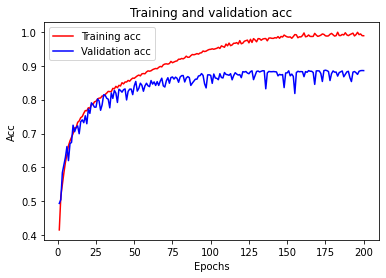

In [ ]:
model_crnn.save('/content/drive/MyDrive/CRNN_GRU.h5')
model_crnn.evaluate(x_valid, y_valid)

# 랜덤샘플링 CRNN
# accuracy: 0.8854

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# CRNN 과대적합 방지
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',
                        input_shape=((x_train.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(3))
model_crnn.add(layers.Dropout(0.3))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.GRU(128))
model_crnn.add(layers.Dense(9, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(x_train,
                    y_train,
                    epochs=200,
                    batch_size=2048,
                    validation_data = (x_valid, y_valid))

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 496, 64)           2944      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 165, 64)          0         
 g1D)                                                            
                                                                 
 dropout (Dropout)           (None, 165, 64)           0         
                                                                 
 conv1d_29 (Conv1D)          (None, 161, 128)          41088     
                                                                 
 gru_9 (GRU)                 (None, 128)               99072     
                                                                 
 dense_8 (Dense)             (None, 9)                 1161      
                                                     

376/376 [==============================] - 10s 27ms/step - loss: 0.5803 - accuracy: 0.8560


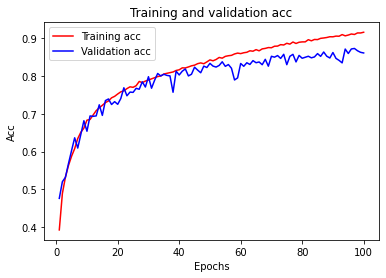

In [ ]:
model_crnn.save('/content/drive/MyDrive/CRNN_GRU_smaller.h5')
model_crnn.evaluate(x_valid, y_valid)

# 랜덤샘플링 CRNN
# accuracy: 0.8610
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# 1D CNN
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(64, 5, activation='relu',
                        input_shape=((x_train.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(9, activation='softmax'))

model_cnn.summary()

model_cnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(x_train,
                    y_train,
                    epochs=200,
                    batch_size=2048,
                    validation_data = (x_valid, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 496, 64)           2944      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 165, 64)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 165, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 161, 128)          41088     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 53, 128)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 53, 128)           0

376/376 [==============================] - 2s 6ms/step - loss: 0.7185 - accuracy: 0.8698


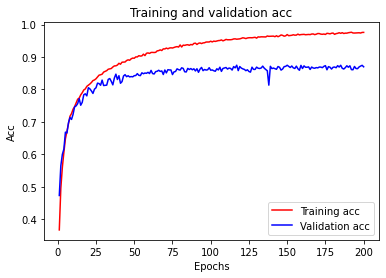

In [ ]:
model_cnn.save('/content/drive/MyDrive/CNN_layer_3.h5')
model_cnn.evaluate(x_valid, y_valid)

# 3층 1D convnet
# accuracy: 0.8698
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

---------

In [ ]:
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical

def getData(usr, day):
  dir_usr = ["user1", "user2", "user3"]
  dir_day = ["day1", "day2", "day3"]
  file_name = ["Hand_Motion.txt","Hand_GPS.txt","Label.txt"]
  path = "/content/drive/MyDrive/SHLdatasets"

  motion_path = path + "/" + dir_usr[usr-1] + "/" + dir_day[day-1] + "/" + file_name[0]
  gps_path = path + "/" + dir_usr[usr-1] + "/" + dir_day[day-1] + "/" + file_name[1]
  label_path = path + "/" + dir_usr[usr-1] + "/" + dir_day[day-1] + "/" + file_name[2]

  print(motion_path)

  # 'Time', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z'
  full_motion = pd.read_csv(motion_path, sep=" ",header=None, usecols=list(range(10)))
  # 'Time', 'GPS_SNR' , 'GPS_Az, ', 'GPS_Elev', 
  full_gps = pd.read_csv(gps_path, sep=" ",header=None, usecols=[0,4,5,6])
  # Null=0, Still=1, Walking=2, Run=3, Bike=4, Car=5, Bus=6, Train=7, Subway=8
  full_label = pd.read_csv(label_path, sep=" ",header=None, usecols=list(range(2)))

  # NaN 제거
  full_motion = full_motion.fillna(0)
  full_gps = full_gps.fillna(0)

  # 1sec 단위로 자르기
  time = -1
  idx2 = 0
  data_1sec = pd.DataFrame()
  label_1sec = pd.DataFrame()
  tmp1 = pd.DataFrame()
  tmp2 = pd.DataFrame()
  for idx1 in range(len(full_gps)):
    gps_time = full_gps.iloc[idx1, 0]//1000
    if gps_time - time >= 1:
      gap = gps_time - time
      time = gps_time
      idx2 += gap*100 if idx1 != 0 else 0
      if idx2 >= len(full_motion):
        break
      while time != full_motion.iloc[idx2, 0]//1000:
        idx2 += 1
      tmp1 = full_gps.iloc[idx1, 1:].T
      tmp2 = full_motion.iloc[idx2, 1:].T
      data_1sec = data_1sec.append(pd.concat([tmp1, tmp2],ignore_index=True),ignore_index=True)
      label_1sec = label_1sec.append(full_label.iloc[idx2, 1:],ignore_index=True)

  # 넘파이로 바꾸기
  final_data = data_1sec.to_numpy()
  final_data = final_data.reshape(-1,1,12)

  label_np = label_1sec.T
  label_np = label_np.to_numpy()

  # one-hot encoding
  final_label = np.zeros(shape=(len(label_np[0]), 9))
  
  label_one_hot = to_categorical(label_np)
  label_one_hot = label_one_hot[0]
  for i in range(len(label_one_hot)):
    final_label[i] = np.pad(label_one_hot[i], (0,9 - len(label_one_hot[i])), constant_values = 0)

  return final_data, final_label

In [ ]:
# day 1,2 데이터로 훈련
for i in range(2):
  for j in range(3):
    if(i == 0 and j == 0):
      train_data, train_label = getData(1, 1)
      continue
    tmp_data, tmp_label = getData(j+1, i+1)
    train_data = np.concatenate([train_data, tmp_data])
    train_label = np.concatenate([train_label, tmp_label])
# day 3 데이터로 검증
for i in range(3):
  if i == 0:
    val_data, val_label = getData(i+1, 3)
    continue
  tmp_data, tmp_label = getData(i+1, 3)
  val_data = np.concatenate([val_data, tmp_data])
  val_label = np.concatenate([val_label, tmp_label])

print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

/content/drive/MyDrive/SHLdatasets/user1/day1/Hand_Motion.txt
/content/drive/MyDrive/SHLdatasets/user2/day1/Hand_Motion.txt
/content/drive/MyDrive/SHLdatasets/user3/day1/Hand_Motion.txt
/content/drive/MyDrive/SHLdatasets/user1/day2/Hand_Motion.txt
/content/drive/MyDrive/SHLdatasets/user2/day2/Hand_Motion.txt
/content/drive/MyDrive/SHLdatasets/user3/day2/Hand_Motion.txt
/content/drive/MyDrive/SHLdatasets/user1/day3/Hand_Motion.txt
/content/drive/MyDrive/SHLdatasets/user2/day3/Hand_Motion.txt
/content/drive/MyDrive/SHLdatasets/user3/day3/Hand_Motion.txt
(181193, 1, 12)
(181193, 9)
(100747, 1, 12)
(100747, 9)


In [ ]:
np.save('/content/drive/MyDrive/SHLdatasets/td',train_data)
np.save('/content/drive/MyDrive/SHLdatasets/tl',train_label)

np.save('/content/drive/MyDrive/SHLdatasets/vd',val_data)
np.save('/content/drive/MyDrive/SHLdatasets/vl',val_label)

In [ ]:
# 1초씩 가져온 데이터
train_data = np.load("/content/drive/MyDrive/SHLdatasets/td.npy")
val_data = np.load("/content/drive/MyDrive/SHLdatasets/vd.npy")
train_label = np.load("/content/drive/MyDrive/SHLdatasets/tl.npy")
val_label = np.load("/content/drive/MyDrive/SHLdatasets/vl.npy")

In [ ]:
train_data = train_data.reshape(train_data.shape[0], 12)
val_data = val_data.reshape(val_data.shape[0], 12)
print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

(181248, 12)
(181248, 9)
(100785, 12)
(100785, 9)


In [ ]:
# 정규화
mean = np.nanmean(train_data, axis=0)
train_data = train_data - mean
val_data = val_data - mean
std = np.nanstd(train_data, axis=0)
train_data/=std
val_data/=std

In [ ]:
def divide_5sec(data, label):
  index = len(data)%5
  if index:
    data = data[:-index]
    label = label[:-index]
  data = data.reshape((len(data)//5, 5, 12))
  label = label.reshape((len(label)//5, 5, 9))
  delete_index = []
  for i in range(len(label)//5):
    index = np.where(label[i][0]==1)[0][0]
    for j in range(4):
      if np.where(label[i][j+1])[0][0] != index:
        delete_index.append(i)
        break
  print(delete_index)
  data = np.delete(data,delete_index, axis=0)
  label = np.delete(label,delete_index, axis=0)
  label = label[ :,:1,]
  label = label.reshape((label.shape[0], label.shape[2]))
  return data, label
train_data, train_label = divide_5sec(train_data, train_label)
val_data, val_label = divide_5sec(val_data, val_label)

[182, 248, 251, 293, 302, 443, 515, 611, 752, 785, 1361, 1631, 2089, 2962, 3073, 3169, 3721, 3760, 3853, 4138, 4165, 4300, 4702, 4816, 4882, 5134, 5184, 5247, 5469, 5535, 5772, 6018, 6021, 6087, 7014, 7164, 7170, 7245]
[146, 257, 344, 1094, 1223, 1268, 1271, 1580, 1583, 1751, 1796, 1814, 1817, 2243, 2273, 2699, 2753, 2867, 2873, 2888, 2891, 3800, 3806]


In [ ]:
def divide_10sec(data, label):
  index = len(data)%10
  if index:
    data = data[:-index]
    label = label[:-index]
  data = data.reshape((len(data)//10, 10, 12))
  label = label.reshape((len(label)//10, 10, 9))
  delete_index = []
  for i in range(len(label)//10):
    index = np.where(label[i][0]==1)[0][0]
    for j in range(4):
      if np.where(label[i][j+1])[0][0] != index:
        delete_index.append(i)
        break
  print(delete_index)
  data = np.delete(data,delete_index, axis=0)
  label = np.delete(label,delete_index, axis=0)
  label = label[ :,:1,]
  label = label.reshape((label.shape[0], label.shape[2]))
  return data, label
train_data, train_label = divide_10sec(train_data, train_label)
val_data, val_label = divide_10sec(val_data, val_label)

[91, 124, 151, 376, 1481]
[73, 172, 547, 634, 790, 898, 907]


In [ ]:
print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

(18119, 10, 12)
(18119, 9)
(10071, 10, 12)
(10071, 9)


In [ ]:
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.LSTM(32, input_shape=(500, 9),
                      dropout = 0.1,
                      kernel_regularizer=regularizers.l1_l2(0.01, 0.001),
                      return_sequences = True))
model.add(layers.LSTM(32, 
                      dropout = 0.1,
                      kernel_regularizer=regularizers.l1_l2(0.01, 0.001),
                      return_sequences = True))
model.add(layers.LSTM(16, input_shape=(5, 12),
                      dropout = 0.5,
                      kernel_regularizer=regularizers.l1_l2(0.01, 0.001)))
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
model.summary()

history = model.fit(x_train,
                    y_train,
                    epochs=60,
                    batch_size=1024,
                    validation_data = (x_valid, y_valid))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 500, 32)           5376      
                                                                 
 lstm_7 (LSTM)               (None, 500, 32)           8320      
                                                                 
 lstm_8 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 9)                 153       
                                                                 
Total params: 16,985
Trainable params: 16,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
47/47 [==============================] - 17s 169ms/step - loss: nan - accuracy: 0.3049 - val_loss: nan - val_accuracy: 0.3182
Epoch 2/60
47/47 [===========================

KeyboardInterrupt: ignored

In [ ]:
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(layers.LSTM(16,input_shape=(10, 12),
                      recurrent_dropout = 0.5, 
                      dropout = 0.3,
                      kernel_regularizer=regularizers.l1_l2(0.01, 0.001)))
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
model.summary()

history = model.fit(train_data,
                    train_label,
                    epochs=1000,
                    batch_size=2048,
                    validation_data = (val_data, val_label))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 16)                1856      
                                                                 
 dense_3 (Dense)             (None, 9)                 153       
                                                                 
Total params: 2,009
Trainable params: 2,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
9/9 [==============================] - 4s 89ms/step - loss: 3.2879 - accuracy: 0.1400 - val_loss: 3.1408 - val_accuracy: 0.1750
Epoch 2/1000
9/9 [==============================] - 0s 50ms/step - loss: 3.1531 - accuracy: 0.1812 - val_loss: 3.0521 - val_accuracy: 0.1953
Epoch 3/1000
9/9 [==============================] - 0s 44ms/step - loss: 3.0491 - accuracy: 0.2229 - val_loss: 2.9745 - val_accuracy: 0.2561
Epoch 4/1000
9/9 [=======

In [ ]:
# accuracy: 0.3498
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.LSTM(16, input_shape=(10, 12),
                      recurrent_dropout = 0.5, 
                      dropout = 0.5,
                      kernel_regularizer=regularizers.l1_l2(0.01, 0.001)))
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
model.summary()

history = model.fit(train_data,
                    train_label,
                    epochs=100,
                    batch_size=1024,
                    validation_data = (val_data, val_label))

In [ ]:
model.evaluate(val_data, val_label)

315/315 [==============================] - 2s 5ms/step - loss: 2.5923 - accuracy: 0.3430


[2.5922913551330566, 0.34296494722366333]

In [ ]:
model.evaluate(val_data, val_label)

315/315 [==============================] - 1s 3ms/step - loss: 2.1021 - accuracy: 0.3498


[2.1021077632904053, 0.34981629252433777]

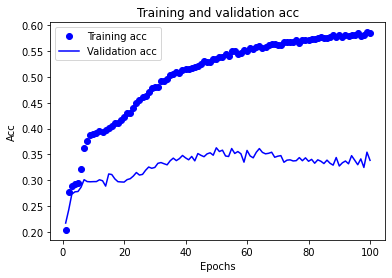

In [ ]:
# 1초간격 데이터를 10초 단위로 2층
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

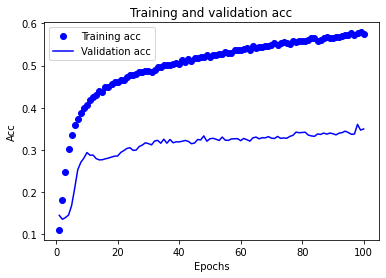

In [ ]:
# 1초간격 데이터를 10초 단위로, 1층
# accuracy: 0.3498
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

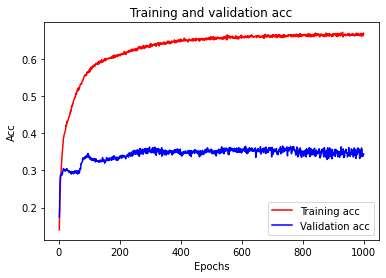

In [ ]:
# 1초간격 데이터를 10초 단위로, 1층
# accuracy: 0.3498
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()